# Image Classification Notes

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

from PIL import Image, ImageOps

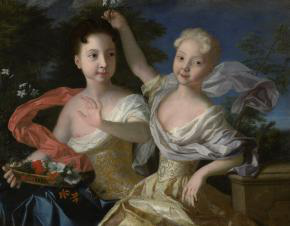

In [2]:
#display an example image
image = Image.open('../Painting-Image-Classification-Project/data/training_set/painting/Painting0015.jpg')
display(image)

In [3]:
# convert image to desired array format
image_array= np.array(image)
image_array[:,:, 1]

array([[36, 38, 26, ..., 58, 53, 53],
       [41, 41, 26, ..., 58, 58, 58],
       [45, 44, 28, ..., 57, 58, 58],
       ...,
       [18, 19, 23, ..., 29, 33, 33],
       [21, 21, 26, ..., 33, 35, 34],
       [22, 21, 26, ..., 33, 35, 34]], dtype=uint8)

In [4]:
# check dimensions of array
image_array.shape

(226, 290, 3)

## File Paths

In [5]:
train_dir = os.fsencode('../Painting-Image-Classification-Project/data/training_set')

test_dir = os.fsencode('../Painting-Image-Classification-Project/data/test_set')

In [6]:
#path name of root directory
rootdir = '../Painting-Image-Classification-Project/data'
rootdir

'../Painting-Image-Classification-Project/data'

In [7]:
#Use root directory to save callable subdirectory paths
traintest_dirs = [os.path.join(rootdir,x) for x in os.listdir(rootdir) if x != '.DS_Store']
traintest_dirs

['../Painting-Image-Classification-Project/data/training_set',
 '../Painting-Image-Classification-Project/data/test_set']

In [8]:
#Access the unique paths for both the train and the test data
train_dir = [os.path.join(traintest_dirs[0],x) for x in os.listdir(traintest_dirs[0])if x != '.DS_Store']
print("Train Data Folder Paths:" , train_dir)

print("")

test_dir = [os.path.join(traintest_dirs[1],x) for x in os.listdir(traintest_dirs[1])if x != '.DS_Store']
print("Test Data Folder Paths:" , test_dir)

Train Data Folder Paths: ['../Painting-Image-Classification-Project/data/training_set/iconography', '../Painting-Image-Classification-Project/data/training_set/painting']

Test Data Folder Paths: ['../Painting-Image-Classification-Project/data/test_set/iconography', '../Painting-Image-Classification-Project/data/test_set/painting']


## Trying to loop through the parent directory to access the files at the bottom of the directory

In [9]:
train_test_dir  =[os.path.join(rootdir,x) for x in os.listdir(rootdir) if x != '.DS_Store']
print(train_test_dir)
os.listdir('../Painting-Image-Classification-Project/data/test_set')

['../Painting-Image-Classification-Project/data/training_set', '../Painting-Image-Classification-Project/data/test_set']


['iconography', '.DS_Store', 'painting']

In [12]:
# list the specific contents of each directory
for x in os.listdir(lis[0]):
    print(x)

iconography746.jpeg
iconography316.jpeg
iconography687.jpg
iconography693.jpg
iconography78.jpg
iconography50.jpg
iconography603.jpeg
iconography1294.jpeg
iconography44.jpg
iconography253.jpeg
iconography879.jpeg
iconography122.jpg
iconography644.jpg
iconography1017.jpeg
iconography480.jpeg
iconography650.jpg
iconography136.jpg
iconography1447.jpeg
iconography93.jpg
iconography1152.jpeg
iconography43.jpeg
iconography195.jpeg
iconography1502.jpeg
iconography678.jpg
iconography485.jpg
iconography341.jpeg
iconography711.jpeg
iconography1386.jpeg
iconography1369.jpeg
iconography87.png
iconography654.jpeg
iconography1410.jpeg
iconography320.jpg
iconography1040.jpeg
iconography984.jpeg
iconography452.jpg
iconography438.jpeg
iconography308.jpg
iconography14.jpeg
iconography1105.jpeg
iconography592.jpeg
iconography1390.jpeg
iconography707.jpeg
iconography297.jpg
iconography725 2.jpeg
iconography512 20.26.19.jpeg
iconography642.jpeg
iconography212.jpeg
iconography838.jpeg
iconography532.jpg
ico

iconography954.jpeg
iconography1090.jpeg
iconography591 2.jpeg
iconography407.jpeg
iconography211.jpg
iconography329.jpeg
iconography1244.jpeg
iconography563.jpg
iconography205.jpg
iconography1957_mainfoto_05.jpg
iconography796.jpeg
iconography1301.jpeg
iconography239.jpg
iconography846.jpeg
iconography145.jpeg
iconography1028.jpeg
iconography93.jpeg
iconography1182.jpeg
iconography515.jpeg
iconography1478.jpeg
iconography1497.jpeg
iconography588.jpg
iconography450.jpeg
iconography903.jpeg
iconography365.jpg
iconography403.jpg
iconography417.jpg
iconography1252.jpeg
iconography295.jpeg
iconography371.jpg
iconography359.jpg
iconography780.jpeg
iconography1194.jpeg
iconography153.jpeg
iconography850.jpeg
iconography915.jpeg
iconography312 20.26.19.jpg
iconography191 18.59.20.jpg
iconography446.jpeg
iconography738.jpeg
iconography601.jpg
iconography167.jpg
iconography368.jpeg
iconography1205.jpeg
iconography692.jpeg
iconography173.jpg
iconography615.jpg
iconography387.jpeg
iconography1340

In [13]:
parent_directory_train= '../Painting-Image-Classification-Project/data/training_set'

In [14]:
class_directory_list_train = [os.path.join(parent_directory_train,x) for x in os.listdir(parent_directory_train) if x != '.DS_Store']

In [16]:
#Train Data

#specify train data file path
parent_directory_train= '../Painting-Image-Classification-Project/data/training_set'

#access each subtype folder within parent directory
class_directory_list_train= [os.path.join(parent_directory_train,x) for x in os.listdir(parent_directory_train) if x != '.DS_Store']
print(class_directory_list_train)

X_train = []
y_train =[]

#loop through each classification folder
for i, x in enumerate(class_directory_list_train):
    #loop through each file within each folder type
    for y in os.listdir(x):
        #ignore .DS_Store File
        if y != '.DS_Store':
            #Convert image to an array of numbers
            X_train.append(np.array(Image.open(x+'/'+y)))
            #append index number, 0 for type Iconography and 1 for type Painting
            y_train.append(i) 
            
#Test Data

#Same as above but for test data
parent_directory_test= '../Painting-Image-Classification-Project/data/test_set'

class_directory_list_test= [os.path.join(parent_directory_test,x) for x in os.listdir(parent_directory_test) if x != '.DS_Store']
print(class_directory_list_test)

X_test = []
y_test =[]

for i, x in enumerate(class_directory_list_test):
    for y in os.listdir(x):
        if y != '.DS_Store':
            X_test.append(np.array(Image.open(x+'/'+y)))
            y_test.append(i)

['../Painting-Image-Classification-Project/data/training_set/iconography', '../Painting-Image-Classification-Project/data/training_set/painting']
['../Painting-Image-Classification-Project/data/test_set/iconography', '../Painting-Image-Classification-Project/data/test_set/painting']


## Save Data as a pickle

In [17]:
import pickle

In [18]:
#X_train
with open('X_train.pkl','wb') as f:
    pickle.dump(X_train, f)    

#y_train
with open('y_train.pkl','wb') as f:
    pickle.dump(y_train, f)  

#X_test
with open('X_test.pkl','wb') as f:
    pickle.dump(X_test, f)  
    
#y_test
with open('y_test.pkl','wb') as f:
    pickle.dump(y_test, f)  

In [19]:
X_train

[array([[[152, 127,  73],
         [152, 127,  73],
         [118,  93,  39],
         ...,
         [117,  99,  49],
         [ 91,  74,  22],
         [ 99,  82,  28]],
 
        [[117,  92,  38],
         [146, 121,  67],
         [162, 137,  83],
         ...,
         [122, 104,  54],
         [135, 118,  66],
         [112,  95,  43]],
 
        [[185, 159, 108],
         [210, 185, 131],
         [221, 196, 142],
         ...,
         [118, 100,  52],
         [126, 108,  58],
         [193, 176, 124]],
 
        ...,
 
        [[255, 228, 156],
         [157, 127,  57],
         [184, 153,  88],
         ...,
         [136, 106,  54],
         [144, 114,  62],
         [111,  81,  27]],
 
        [[227, 197, 125],
         [175, 145,  75],
         [197, 166, 101],
         ...,
         [114,  84,  30],
         [129, 100,  44],
         [121,  92,  34]],
 
        [[172, 142,  70],
         [236, 206, 136],
         [255, 225, 160],
         ...,
         [ 73,  44,   0],
  

Attempts to write function

In [36]:
def DataMaker(parent_directory): # parent directory refers to either train or test folder
    #initialize empty lists for output
    X_array = []
    y_array = []
# here we create global path of directories for each class 
    class_directory_list = [os.path.join(parent_directory,x) for x in os.listdir(parent_directory) if x != '.DS_Store']
    print(class_directory_list)
    
    for i, x in enumerate(class_directory_list):
        print(x)
        for k in x:
            if os.path.basename(k) != '.DS_Store':
                X_array.append(np.array(Image.open(k)))
                y_array.append(i)
            
    return X_array,y_array

In [37]:
X_train, y_train = DataMaker('../Painting-Image-Classification-Project/data/training_set')

['../Painting-Image-Classification-Project/data/training_set/iconography', '../Painting-Image-Classification-Project/data/training_set/painting']
../Painting-Image-Classification-Project/data/training_set/iconography


IsADirectoryError: [Errno 21] Is a directory: '.'

In [38]:
X_test, y_test = DataMaker('../Painting-Image-Classification-Project/data/test_set')

['../Painting-Image-Classification-Project/data/test_set/iconography', '../Painting-Image-Classification-Project/data/test_set/painting']
../Painting-Image-Classification-Project/data/test_set/iconography


IsADirectoryError: [Errno 21] Is a directory: '.'

In [ ]:
(X_train[5]).shape

In [ ]:
(X_test[5]).shape

In [ ]:
len(y_test)

In [ ]:
len(y_train)

In [ ]:
np.unique(y_train)